Kp: 2.0
taus: 1.0
zeta: 2.0
Kp: 2.0
taus: 1.0
zeta: 1.0
Kp: 2.0
taus: 1.0
zeta: 0.5


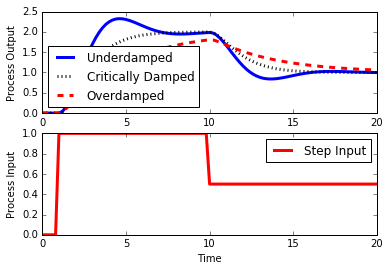

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# specify number of steps
ns = 100
# define time points
t = np.linspace(0,ns/5.0,ns+1)

class model(object):
    # default process model
    Kp = 2.0
    taus = 1.0
    thetap = 0.0
    zeta = 1.0

def process(x,t,u,Kp,taus,zeta):
    # Kp = process gain
    # taus = second order time constant
    # zeta = damping factor
    # ts^2 dy2dt2 + 2 zeta taus dydt + y = Kp u(t-thetap)
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*taus*dydt - y + Kp*u)/taus**2
    return [dydt, dy2dt2]

def calc_response(t,m):
    # t = time points
    # m = process model
    Kp = m.Kp
    taus = m.taus
    thetap = m.thetap
    zeta = m.zeta
    
    print('Kp: ' + str(Kp))
    print('taus: ' + str(taus))
    print('zeta: ' + str(zeta))
    
    # specify number of steps
    ns = len(t)-1
    delta_t = t[1]-t[0]
    
    # storage for recording values
    op = np.zeros(ns+1)     # controller output
    pv = np.zeros((ns+1,2)) # process variabel [dydt,dy2dt2]
    
    # step input
    op[5:] = 1.0
    op[50:] =0.5
    
    # simulate time delay
    ndelay = int(np.ceil(thetap/delta_t))
    
    # loop through time steps
    for i in range(0,ns):
        # implement time delay
        iop = max(0,i-ndelay)
        inputs = (op[iop],Kp,taus,zeta)
        y = odeint(process,pv[i],[0,delta_t],args=inputs) # y = [y, dydt]
        pv[i+1] = y[-1]  # pv is two dimensional array
    return (pv,op)

# overdamped step response
model.zeta = 2.0
(pv1,op1) = calc_response(t,model)

# critically damped step response
model.zeta = 1.0
(pv2,op2)= calc_response(t,model)

# underdamped step response
model.zeta = 0.5
(pv3,op3) = calc_response(t,model)

%matplotlib inline
plt.figure(1)

plt.subplot(2,1,1)
plt.plot(t,pv3[:,0],'b-',linewidth=3,label='Underdamped')
plt.plot(t,pv2[:,0],'k:',linewidth=3,label='Critically Damped')
plt.plot(t,pv1[:,0],'r--',linewidth=3,label='Overdamped')  
plt.legend(loc='best')
plt.ylabel('Process Output')

plt.subplot(2,1,2)
plt.plot(t,op1,'r-',linewidth=3,label='Step Input')
plt.legend(loc='best')
plt.ylabel('Process Input')

plt.xlabel('Time')
plt.savefig('output.png')
plt.show()